In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# GridSearchCV (Cross Validation - 교차 검정): 하이퍼 파라미터 튜닝 도구
## K-Fold 교차 검정
## 하이퍼파라미터 조합을 격자 탐색 방식으로 테스트하고, 가장 성능이 좋은 조합을 찾아주는 역할을 합니다.
from sklearn.model_selection import GridSearchCV

In [2]:
default_pre = pd.read_csv('data/default_pre.csv')
default_scaled = pd.read_csv('data/default_scaled.csv')

# 데이터 구조

In [3]:
default_pre

# loan_limit
# 대출 한도와 관련된 정보를 나타냅니다.
# 예시 값: cf (이 변수의 의미는 데이터 설명서에 따라 더 명확히 알 수 있습니다.)


# Gender
# 대출 신청자의 성별을 나타냅니다.
# 값:
# Male: 남성
# Female: 여성
# Joint: 공동 신청 (부부 또는 공동 신청자)
# Sex Not Available: 성별 정보가 제공되지 않음

# approv_in_adv
# 사전 승인이 되었는지 여부를 나타냅니다.
# 값:
# pre: 사전 승인됨
# nopre: 사전 승인되지 않음


# loan_type
# 대출의 유형을 나타냅니다.
# 예시 값: type1, type2

# business_or_commercial
# 대출이 상업적 목적인지 여부를 나타냅니다.
# 값:
# b/c: 상업 또는 비즈니스 목적
# nob/c: 상업적 목적이 아님

# loan_amount
# 신청된 대출 금액을 나타내며, 단위는 아마도 USD(미국 달러)일 것입니다.
# 예시: 116500, 206500 등

# income
# 대출 신청자의 소득을 나타냅니다.
# 예시: 1740.0, 4980.0 등 (소득의 단위도 아마 USD일 가능성이 높습니다.)

# Credit_Score
# 신청자의 신용 점수를 나타냅니다.
# 예시: 758, 552 등 (일반적으로 300~850 사이의 범위를 가집니다.)

# Status
# 대출 신청의 승인 여부를 나타내는 이진 변수입니다.
# 값:
# 1: 승인됨
# 0: 거절됨

,loan_limit,Gender,approv_in_adv,loan_type,business_or_commercial,loan_amount,income,Credit_Score,Status
0,cf,Sex Not Available,nopre,type1,nob/c,116500,1740.0,758,1
1,cf,Male,nopre,type2,b/c,206500,4980.0,552,1
2,cf,Male,pre,type1,nob/c,406500,9480.0,834,0
3,cf,Male,nopre,type1,nob/c,456500,11880.0,587,0
4,cf,Joint,pre,type1,nob/c,696500,10440.0,602,0
...,...,...,...,...,...,...,...,...,...
135390,cf,Sex Not Available,nopre,type1,nob/c,436500,7860.0,659,0
135391,cf,Male,nopre,type1,nob/c,586500,7140.0,569,0
135392,cf,Male,nopre,type1,nob/c,446500,6900.0,702,0
135393,cf,Female,nopre,type1,nob/c,196500,7140.0,737,0


In [5]:
default_pre['loan_limit'].value_counts()

loan_limit
cf     126327
ncf      9068
Name: count, dtype: int64

In [8]:
default_pre['approv_in_adv'].value_counts()

approv_in_adv
nopre    113302
pre       22093
Name: count, dtype: int64

In [9]:
default_pre['loan_type'].value_counts()

loan_type
type1    109781
type2     16555
type3      9059
Name: count, dtype: int64

In [11]:
default_pre['business_or_commercial'].value_counts()

business_or_commercial
nob/c    118840
b/c       16555
Name: count, dtype: int64

In [4]:
default_scaled

,loan_limit,approv_in_adv,loan_amount,income,Credit_Score,Status,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type1,loan_type_type2,loan_type_type3,business_or_commercial_b/c,business_or_commercial_nob/c
0,1.0,0.0,0.028090,0.003007,0.6450,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.053371,0.008607,0.1300,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.109551,0.016385,0.8350,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.123596,0.020533,0.2175,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.191011,0.018044,0.2550,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135390,1.0,0.0,0.117978,0.013585,0.3975,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
135391,1.0,0.0,0.160112,0.012341,0.1725,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
135392,1.0,0.0,0.120787,0.011926,0.5050,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
135393,1.0,0.0,0.050562,0.012341,0.5925,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 시작

(1) 리스트를 인자로 받아서 리스트 내에 포함된 3의 배수 또는 5의 배수의 개수를 반환하는 함수 three_five_count()을 작성하십시오. 

(2) 201부터 500까지 정수로 이루어진 리스트 b를 생성하시오.

(3) three_five_count(b)의 결과를 주석으로 적으시오.

In [51]:
def three_five_count(num_list):
  return_list = []
  for i in num_list:
    if ((i % 3 == 0) or (i % 5 == 0)):
      return_list.append(i)
  return return_list

b = list(range(201, 501))

In [52]:
print(len(three_five_count(b)))

140


In [ ]:
# [201, 204, 205, 207, 210, 213, 215, 216, 219, 220, 222, 225, 228, 230, 231, 234, 235, 237, 240, 243, 245, 246, 249, 250, 252, 255, 258, 260, 261, 264, 265, 267, 270, 273, 275, 276, 279, 280, 282, 285, 288, 290, 291, 294, 295, 297, 300, 303, 305, 306, 309, 310, 312, 315, 318, 320, 321, 324, 325, 327, 330, 333, 335, 336, 339, 340, 342, 345, 348, 350, 351, 354, 355, 357, 360, 363, 365, 366, 369, 370, 372, 375, 378, 380, 381, 384, 385, 387, 390, 393, 395, 396, 399, 400, 402, 405, 408, 410, 411, 414, 415, 417, 420, 423, 425, 426, 429, 430, 432, 435, 438, 440, 441, 444, 445, 447, 450, 453, 455, 456, 459, 460, 462, 465, 468, 470, 471, 474, 475, 477, 480, 483, 485, 486, 489, 490, 492, 495, 498, 500]

In [22]:
# 2-1. 1부터 1000까지 1000개의 원소를 가지는 리스트를 생성하여 변수 a에 할당하시오.
a = list(range(1, 1001))
type(a)

list

In [23]:
# 2-2. 변수 a를 사용하여 넘파이 배열 nd_a를 생성하시오.
nd_a = np.array(a)
type(nd_a)


numpy.ndarray

In [26]:
# 2-3. nd_a의 차원을 10*100으로 변경하시오.
nd_a = nd_a.reshape(10, 100)
nd_a.shape

(10, 100)

In [28]:
nd_a

array([[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100],
       [ 101,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
         112,  113,  114,  115,  116,  117,  118,  119,  120,  121,  122,
         123,  124,  125,  126,  127,  128,  129,  130,  131,  132,  133,
         134,  135,  136,  137,  138,  139,  140,  141,  142,  143,  144,
         145,  146,  14

In [27]:
# 2-4. nd_a 행렬의 3번째행, 5번째열의 원소(인덱스로는 각각 2, 4)를 출력하시오. 결과를 주석으로 적으시오.
nd_a[2, 4]

205

In [29]:
# 2-5. nd_a의 두 번째 행을 출력하시오.
print(nd_a[1])

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200]


# 3번

In [30]:
# 3-1. default_pre.csv 파일을 읽어서 default_df에 저장하시오. default_df의 행과 열의 수를 주석으로 적으시오.
default_df = pd.read_csv('data/default_pre.csv')


In [31]:
default_df.shape

(135395, 9)

In [32]:
# 3-2. loan_type 컬럼의 각 범주별로('type1','type2','type3') 레코드 수를 구하시오. 결과를 주석으로 적으시오
default_df['loan_type'].value_counts()

loan_type
type1    109781
type2     16555
type3      9059
Name: count, dtype: int64

In [ ]:
# loan_type
# type1    109781
# type2     16555
# type3      9059
# Name: count, dtype: int64

In [ ]:
# 3-3. loan_type이 'type1'인 고객들만 선택하여 Gender, loan_amount, Credit_Score를 출력하시오
# . 

In [33]:
default_df[default_df['loan_type'] == 'type1'][['Gender', 'loan_amount', 'Credit_Score']]

,Gender,loan_amount,Credit_Score
0,Sex Not Available,116500,758
2,Male,406500,834
3,Male,456500,587
4,Joint,696500,602
5,Joint,706500,864
...,...,...,...
135390,Sex Not Available,436500,659
135391,Male,586500,569
135392,Male,446500,702
135393,Female,196500,737


In [34]:
# 3-4. loan_type이 'type1'인 고객들만 선택하여 Gender, loan_amount,Credit_Score를 출력하시오(loc 연산자를 사용). 출력의 행의 수를 주석으로 적으시오
default_df.loc[default_df['loan_type'] == 'type1', ['Gender', 'loan_amount', 'Credit_Score']]

,Gender,loan_amount,Credit_Score
0,Sex Not Available,116500,758
2,Male,406500,834
3,Male,456500,587
4,Joint,696500,602
5,Joint,706500,864
...,...,...,...
135390,Sex Not Available,436500,659
135391,Male,586500,569
135392,Male,446500,702
135393,Female,196500,737


In [35]:
# 3-5. loan_type이 'type1'이면서 income이 10,000 이상은 고객들만 출력하시오. 출력의 행의 수를 주석으로 적으시오.
default_df.loc[(default_df['loan_type'] == 'type1') & (default_df['income'] >= 10000)]

,loan_limit,Gender,approv_in_adv,loan_type,business_or_commercial,loan_amount,income,Credit_Score,Status
3,cf,Male,nopre,type1,nob/c,456500,11880.0,587,0
4,cf,Joint,pre,type1,nob/c,696500,10440.0,602,0
5,cf,Joint,pre,type1,nob/c,706500,10080.0,864,0
17,cf,Sex Not Available,nopre,type1,nob/c,586500,12540.0,688,0
18,cf,Joint,nopre,type1,nob/c,306500,16860.0,668,0
...,...,...,...,...,...,...,...,...,...
135344,cf,Joint,pre,type1,nob/c,246500,10320.0,772,1
135349,cf,Male,pre,type1,nob/c,406500,10740.0,698,0
135364,cf,Joint,nopre,type1,nob/c,406500,11700.0,672,0
135383,cf,Joint,nopre,type1,nob/c,326500,15360.0,688,0


In [42]:
# 3-6. loan_type별로 평균 수입을 구하시오. 가장 평균 수입이 높은 loan_type이 무엇인지 주석으로 적으시오.
default_df.groupby(by='loan_type')['income'].mean()
# df.groupby(by='City')['Age'].mean()

loan_type
type1    7480.516847
type2    4504.925400
type3    5193.109615
Name: income, dtype: float64

In [43]:
# 3-7. 수입(income)이 4,000불 미만이면 'Low',
# 4,000불 이상 8,000불 미만이면 'Middle', 8,000불 이상이면 'High'를 가지는 컬럼 incomelevel 컬럼을
# apply lambda를 사용하여 생성하시오. incomelevel 값이 'High'인 레코드 수를 주석으로 적으시오.

default_df['incomelevel'] = default_df['income'].apply(lambda x: 'Low' if x < 4000 else 'Middle' if (x >= 4000 and x < 8000) else 'High')

In [45]:
# default_df[default_df['incomelevel'] == 'High']
default_df['incomelevel'].value_counts()

incomelevel
Middle    58322
High      38688
Low       38385
Name: count, dtype: int64

# 4번

In [ ]:
# 4-1. default_pre.csv 파일을 읽어서 default_df에 저장하시오.

In [2]:
default_df = pd.read_csv('data/default_pre.csv')

In [10]:
default_df['loan_amount'].mean()

329483.7881753388

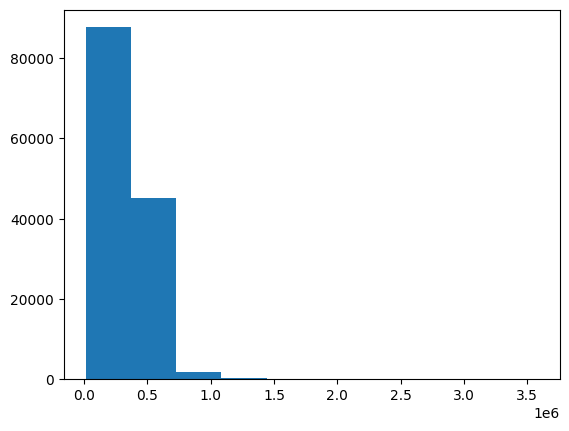

In [17]:
# 4-2. matplotlib를 이용해서 loan_amount 값에 대한 히스토그램을 그리시오. 작성한 그래프를 답안에 포함시키시오.
import matplotlib.pyplot as plt

plt.hist(default_df['loan_amount'])
plt.show()

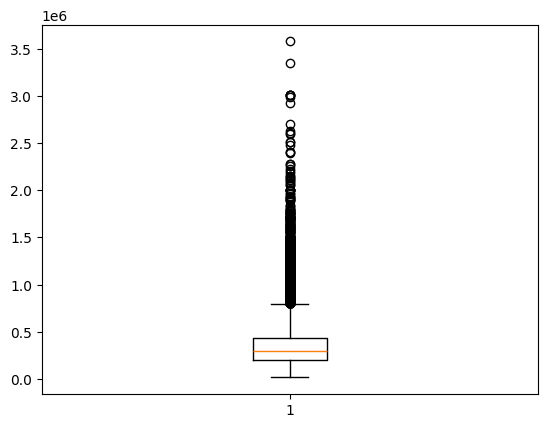

In [18]:


# 4-3. matplotlib를 이용해서 loan_amount 값에 대한 박스플랏을 그리시오. 작성한 그래프를 답안에 포함하시오. 
plt.boxplot(default_df['loan_amount'])
plt.show()

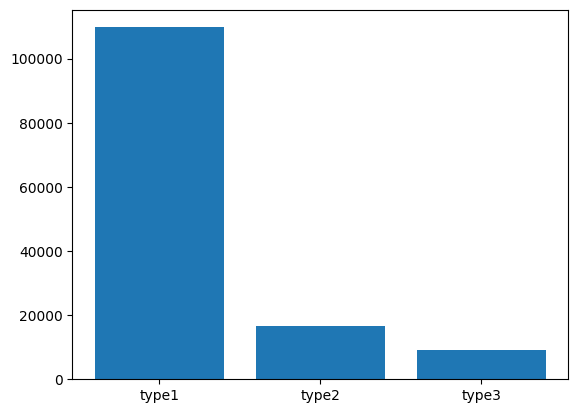

In [11]:
# 4-4. matplotlib를 이용해서 loan_type 값에 대한 바 차트를 그리시오. 작성한 그래프를 답안에 포함시키시오. 가장 레코드 수가 많은 타입이 무엇인지 주석으로 적으시오.
plt.bar(default_df['loan_type'].value_counts().index, default_df['loan_type'].value_counts().values)
plt.show()

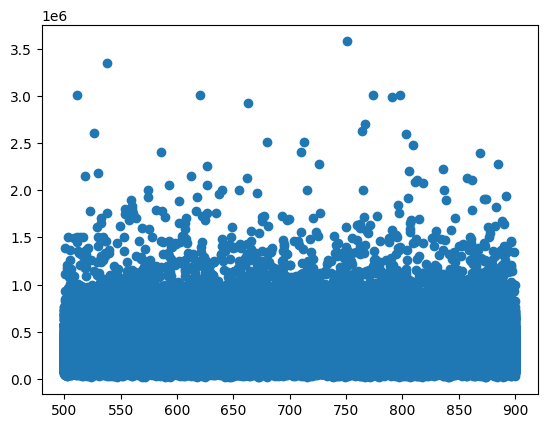

In [12]:
# 4-5. matplotlib를 이용해서 x축을 Credit_Score, y축을 loan_amount로 해서 산점도를 그리시오. 작성한 그래프를 답안에 포함시키시오.
plt.scatter(default_df['Credit_Score'], default_df['loan_amount'])
plt.show()

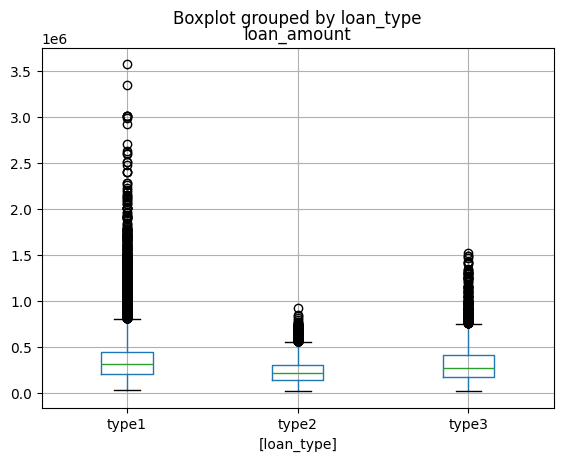

In [15]:
# 4-6. pandas 내장 함수를 이용해서 loan_type 별로 loan_amount 값에 대한 박스 플랏을 그리시오. 작성한 그래프를 답안에 포함시키시오.
# loan_amount의 중간값이 가장 큰 타입은 무엇인지 주석으로 적으시오.
default_df[['loan_type', 'loan_amount']].boxplot(by='loan_type')
plt.show()

In [21]:
# type별 loan_amount의 중간값
default_df.groupby(by='loan_type')['loan_amount'].median()

loan_type
type1    316500.0
type2    216500.0
type3    266500.0
Name: loan_amount, dtype: float64

<Axes: title={'center': 'loan_amount'}, xlabel='[loan_type]'>

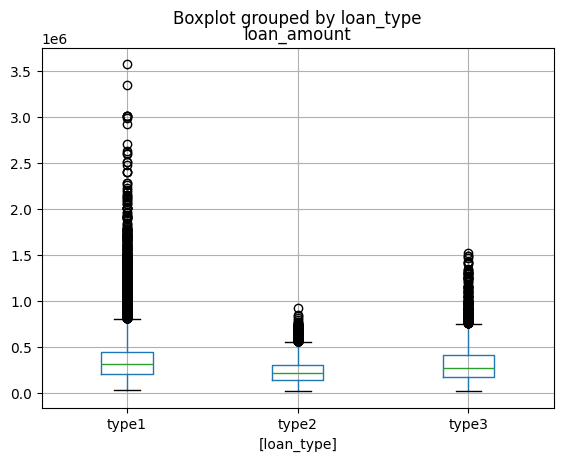

In [19]:
# 4-6. pandas 내장 함수를 이용해서 loan_type 별로 loan_amount 값에 대한 박스 플랏을 그리시오. 작성한 그래프를 답안에 포함시키시오. loan_amount의 중간값이 가장 큰 타입은 무엇인지 주석으로 적으시오.
default_df[['loan_type', 'loan_amount']].boxplot(by='loan_type')

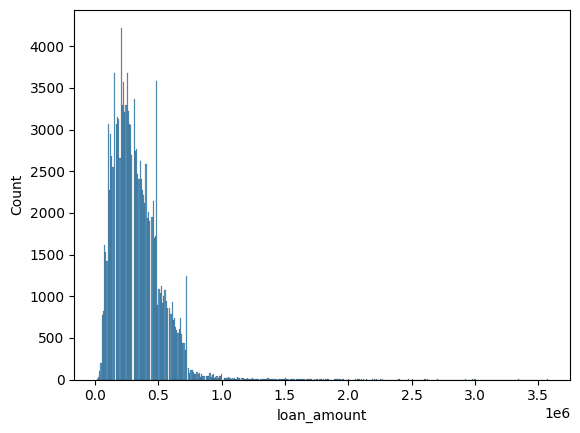

In [23]:
# 4-7. seaborn을 이용해서 loan_amount 값에 대한 히스토그램을 그리시오. 작성한 그래프를 답안에 포함시키시오.
import seaborn as sns

sns.histplot(x='loan_amount', data=default_df)
plt.show()

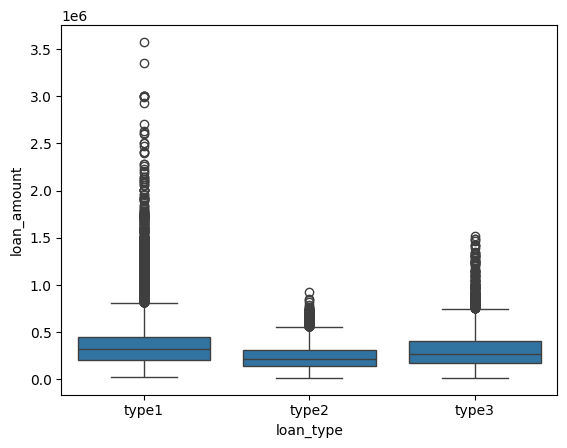

In [25]:
# 4-8. seaborn을 이용해서 loan_type 별로 loan_amount 값에 대한 박스 플랏을 그리시오. 작성한 그래프를 답안에 포함시키시오.
sns.boxplot(x='loan_type', y='loan_amount', data=default_df)
plt.show()

In [28]:
default_df

,loan_limit,Gender,approv_in_adv,loan_type,business_or_commercial,loan_amount,income,Credit_Score,Status
0,cf,Sex Not Available,nopre,type1,nob/c,116500,1740.0,758,1
1,cf,Male,nopre,type2,b/c,206500,4980.0,552,1
2,cf,Male,pre,type1,nob/c,406500,9480.0,834,0
3,cf,Male,nopre,type1,nob/c,456500,11880.0,587,0
4,cf,Joint,pre,type1,nob/c,696500,10440.0,602,0
...,...,...,...,...,...,...,...,...,...
135390,cf,Sex Not Available,nopre,type1,nob/c,436500,7860.0,659,0
135391,cf,Male,nopre,type1,nob/c,586500,7140.0,569,0
135392,cf,Male,nopre,type1,nob/c,446500,6900.0,702,0
135393,cf,Female,nopre,type1,nob/c,196500,7140.0,737,0


In [46]:
default_df = pd.read_csv('data/default_pre.csv')
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135395 entries, 0 to 135394
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_limit              135395 non-null  object 
 1   Gender                  135395 non-null  object 
 2   approv_in_adv           135395 non-null  object 
 3   loan_type               135395 non-null  object 
 4   business_or_commercial  135395 non-null  object 
 5   loan_amount             135395 non-null  int64  
 6   income                  135395 non-null  float64
 7   Credit_Score            135395 non-null  int64  
 8   Status                  135395 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 9.3+ MB


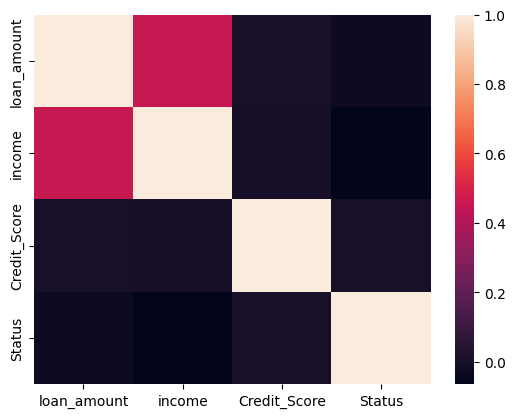

In [49]:
# 4-9. seaborn을 이용해서 전체 변수들에 대한 히트맵을 그리시오.
# 작성한 그래프를 답안에 포함시키시오.
# 가장 상관이 높은 컬럼쌍을 주석으로 적으시오.
default_df = pd.read_csv('data/default_pre.csv')

sns.heatmap(default_df[['loan_amount', 'income', 'Credit_Score', 'Status']].corr(), annot=False)
plt.show()

# 5번 문제

In [29]:
# 5-1. default_scaled.csv 파일을 읽어서 default_df에 저장하시오. 행의 개수와 열의 개수를 주석으로 적으시오.
default_df = pd.read_csv('data/default_scaled.csv')

In [30]:
default_df.shape

(135395, 15)

In [31]:
default_df.columns

Index(['loan_limit', 'approv_in_adv', 'loan_amount', 'income', 'Credit_Score',
       'Status', 'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'loan_type_type1', 'loan_type_type2',
       'loan_type_type3', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c'],
      dtype='object')

In [ ]:
# 5-2. Status를 제외한 컬럼으로 입력변수들로, Status 를 출력변수로 하고, 훈련 데이터와 테스트 데이터를 7:3로 분할하시오.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(default_df.drop('Status', axis=1), default_df['Status'], test_size=0.3)

In [33]:
# 5-3. 분류 모델의 성능을 출력하는 함수 get_clf_eval()을 작성하시오. get_clf_eval() 함수에 f1_score 값도 출력하도록 포함하시오.
from sklearn.metrics import recall_score, accuracy_score, f1_score

def get_clf_eval(y_test, pred):
  accuracy = accuracy_score(y_test, pred) ## 정확도 (Accuracy)
  recall = recall_score(y_test, pred)  ## 재현율 (Recall)
  f1 = f1_score(y_test, pred) ## F1 스코어

  print("정확도: {0:.4f}. 재현율: {1:.4f}, F1 Score: {2:.4f}".format(accuracy, recall, f1))

In [34]:
# 5-4. 의사결정나무를 만들고 분류 성능을 평가하시오. 주석으로 정확도, 재현율, f1 score를 적으시오.
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

get_clf_eval(y_test, dt_pred)


정확도: 0.6426. 재현율: 0.3312, F1 Score: 0.3204


In [35]:
# 5-5. 로지스틱 회귀 분석 모형을 만들고 분류 성능을 평가하시오. 주석으로 정확도, 재현율, f1 score를 적으시오.

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

get_clf_eval(y_test, lr_pred)

정확도: 0.7448. 재현율: 0.0064, F1 Score: 0.0126


In [36]:
# 5-6. 랜덤포레스트 모형을 만들고 분류 성능을 평가하시오. 주석으로 정확도, 재현율, f1 score를 적으시오.
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

get_clf_eval(y_test, rf_pred)

정확도: 0.7362. 재현율: 0.1820, F1 Score: 0.2598


In [37]:
# 5-7. MLP 모형을 만들고 분류 성능을 평가하시오(단 히든 레이어는 (5,5,5)로 하시오). 주석으로 정확도, 재현율, f1 score를 적으시오.
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(5, 5, 5))
mlp_clf.fit(X_train , y_train)
mlp_pred = mlp_clf.predict(X_test)

get_clf_eval(y_test, mlp_pred)

정확도: 0.7629. 재현율: 0.0892, F1 Score: 0.1607


In [38]:
# 5-8. 트리의 깊이를 5로 해서 트리를 다시 생성하고 트리를 텍스트 형태로 출력하시오. 가장 처음 분기에 사용된 입력변수가 무엇인지 주석으로 적으시오.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print(tree.export_text(dt_clf))



|--- feature_3 <= 0.00
|   |--- feature_2 <= 0.02
|   |   |--- feature_3 <= 0.00
|   |   |   |--- feature_3 <= 0.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_3 >  0.00
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |--- feature_3 >  0.00
|   |   |   |--- feature_4 <= 0.04
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_4 >  0.04
|   |   |   |   |--- feature_4 <= 0.10
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_4 >  0.10
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.86
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.69
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.00
|   |   |   |   |   |   |   |   

<Axes: ylabel='None'>

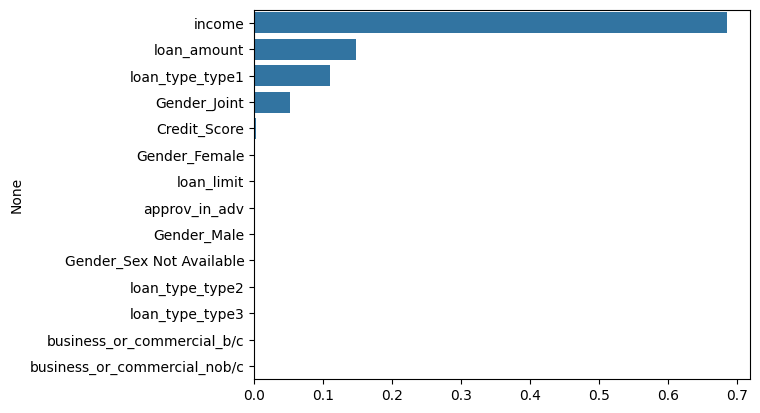

In [40]:
# 5-9. max_depth=5인 트리에서 피처 중요도를 구하고,
# 그래프로 그리시오. 그래프를 답안에 포함하고,
# 가장 중요한 변수가 무엇인지 주석으로 적으시오.

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)

fi = dt_clf.feature_importances_

import seaborn as sns
import pandas as pd
dt_fi_series = pd.Series(data=fi, index=X_train.columns)
sns.barplot(x=dt_fi_series.sort_values(ascending=False).values, y=dt_fi_series.sort_values(ascending=False).index)


In [41]:
# 5-10. 앞서 만든, 의사결정나무(max_depth=5인 트리), 로지스틱회귀분석, MLP 모델로 이루어진 보팅 분류기를 만들어서 성능을 평가하시오. 주석으로 정확도, 재현율, f1 score를 적으시오.
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(estimators=[('dt', dt_clf), ('lr', lr_clf), ('mlp', mlp_clf)], voting='soft')
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)

get_clf_eval(y_test, pred)


정확도: 0.7586. 재현율: 0.0560, F1 Score: 0.1056


<Axes: ylabel='None'>

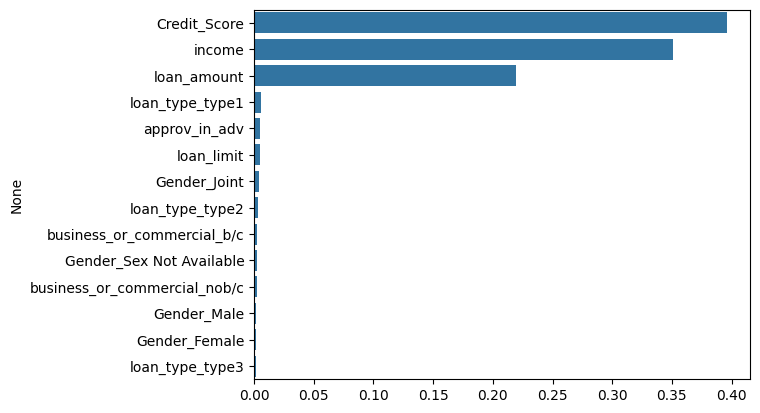

In [42]:
# 5-11. 5-6번에서 만든 랜덤 포레스트 모델의 입력 변수의 중요도를 가시화 하시오. 그래프를 답안에 포함시키시오. 또 모델에서 가장 중요한 변수가 무엇인지 주석으로 적으시오.
import seaborn as sns
import pandas as pd

rf_clf_fi = rf_clf.feature_importances_
rf_clf_fi_series = pd.Series(data=rf_clf_fi, index=X_train.columns)
sns.barplot(x=rf_clf_fi_series.sort_values(ascending=False).values, y=rf_clf_fi_series.sort_values(ascending=False).index)

